# Standard Imports

In [ ]:
import matplotlib.pyplot as plt

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

import os

import numpy as np
import pandas as pd
import nltk
import rake_nltk
from rake_nltk import Rake
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch


# Reading in the Datasets

In [ ]:
imdb_movies = pd.read_csv("/Users/meghanrokas/Downloads/IMDb-movies-csv.csv")

In [ ]:
imdb_movies = pd.read_csv("/Users/meghanrokas/Downloads/IMDb-movies-csv.csv")

In [ ]:
imdb_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Denmark, Germany",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
imdb_names = pd.read_csv("/Users/meghanrokas/Downloads/IMDb-names-csv.csv")

In [ ]:
imdb_names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [ ]:
imdb_ratings = pd.read_csv("/Users/meghanrokas/Downloads/IMDb-ratings-csv.csv")

In [ ]:
imdb_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [ ]:
imdb_titlePrinc = pd.read_csv("/Users/meghanrokas/Downloads/IMDb-title_principals-csv.csv")

In [ ]:
imdb_titlePrinc.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


In [ ]:
netflix_title = pd.read_csv("/Users/meghanrokas/Downloads/netflix_titles-csv.csv")

In [ ]:
netflix_title.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Pre-Processing

In [ ]:
#combining the imdb datasets

In [ ]:
IMDB = imdb_movies.set_index('imdb_title_id').join(imdb_ratings.set_index('imdb_title_id'))

In [ ]:
IMDB = IMDB.join(imdb_titlePrinc.set_index('imdb_title_id'))

In [ ]:
IMDB = IMDB.set_index('imdb_name_id').join(imdb_names.set_index('imdb_name_id'))

In [ ]:
IMDB.head()

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_name_id,,,,,,,,,,,,,,,,,,,,,
nm0000001,Cerco il mio amore,The Gay Divorcee,1934,1934-10-12,"Comedy, Musical, Romance",107,USA,"English, French, Italian",Mark Sandrich,"Dwight Taylor, Kenneth S. Webb",...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
nm0000001,Roberta,Roberta,1935,1935-03-08,"Comedy, Musical, Romance",106,USA,"English, French, Russian",William A. Seiter,"Jerome Kern, Otto A. Harbach",...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
nm0000001,Cappello a cilindro,Top Hat,1935,1938-01-24,"Comedy, Musical, Romance",101,USA,"English, Italian",Mark Sandrich,"Dwight Taylor, Allan Scott",...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
nm0000001,Seguendo la flotta,Follow the Fleet,1936,1936-02-20,"Comedy, Musical, Romance",110,USA,English,Mark Sandrich,"Dwight Taylor, Allan Scott",...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
nm0000001,Follie d'inverno,Swing Time,1936,1938-02-24,"Comedy, Musical, Romance",103,USA,"English, French",George Stevens,"Howard Lindsay, Allan Scott",...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0


In [ ]:
#checking to make sure that I successfully joined the tables
unique_cols = IMDB.columns
unique_cols

Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45age_av

Now I want to look at the null content of each column

In [ ]:
IMDB.isnull().sum()

title                         0
original_title                0
year                          0
date_published                0
genre                         0
                          ...  
spouses_string           563060
spouses                      10
divorces                     10
spouses_with_children        10
children                     10
Length: 89, dtype: int64

In [ ]:
#for now, I'm just going to fill the NAs with whitespace
IMDBfill = IMDB.fillna(' ')

In [ ]:
IMDBMovie = IMDB[['title','genre','director','actors','description']]
IMDBMovie = IMDBMovie.fillna('NAN')

# discarding the commas between the actors' full names and getting only the first three names
IMDBMovie['actors'] = IMDBMovie['actors'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
IMDBMovie['genre'] = IMDBMovie['genre'].map(lambda x: x.lower().split(','))

IMDBMovie['director'] = IMDBMovie['director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in IMDBMovie.iterrows():
    row['actors'] = [x.lower().replace(' ','') for x in row['actors']]
    row['director'] = ''.join(row['director']).lower()

In [ ]:
#Extracting keywords from plots
# initializing the new column
IMDBMovie['Key_words'] = ""

for index, row in IMDBMovie.iterrows():
    plot = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
IMDBMovie.drop(columns = ['description'], inplace = True)

In [ ]:
IMDBMovie.set_index('title', inplace = True)
IMDBMovie.head()

,genre,director,actors,Key_words
title,,,,
Cerco il mio amore,"[comedy, musical, romance]",marksandrich,"[fredastaire, gingerrogers, alicebrady]","[meets, england, falls, seek, dashing, perform..."
Roberta,"[comedy, musical, romance]",williama.seiter,"[irenedunne, fredastaire, gingerrogers]","[bandleader, friend, reunites, fashion, sudden..."
Cappello a cilindro,"[comedy, musical, romance]",marksandrich,"[fredastaire, gingerrogers, edwardeveretthorton]","[model, britain, goofy, producer, mistakes, fa..."
Seguendo la flotta,"[comedy, musical, romance]",marksandrich,"[fredastaire, gingerrogers, randolphscott]","[woman, san, francisco, rekindle, loves, roman..."
Follie d'inverno,"[comedy, musical, romance]",georgestevens,"[fredastaire, gingerrogers, victormoore]","[fiancée, beautiful, aspiring, dancer, raise, ..."


In [ ]:
IMDB.columns

Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'weighted_average_vote',
       'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9',
       'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3',
       'votes_2', 'votes_1', 'allgenders_0age_avg_vote',
       'allgenders_0age_votes', 'allgenders_18age_avg_vote',
       'allgenders_18age_votes', 'allgenders_30age_avg_vote',
       'allgenders_30age_votes', 'allgenders_45age_avg_vote',
       'allgenders_45age_votes', 'males_allages_avg_vote',
       'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
       'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote',
       'males_30age_votes', 'males_45age_av

In [ ]:
IMDB.set_index('title', inplace = True)

In [ ]:
IMDB.to_csv('IMDB.csv')

In [ ]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835503 entries, Cerco il mio amore to RiffTrax Live: Samurai Cop
Data columns (total 88 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   original_title             835503 non-null  object 
 1   year                       835503 non-null  object 
 2   date_published             835503 non-null  object 
 3   genre                      835503 non-null  object 
 4   duration                   835503 non-null  int64  
 5   country                    834958 non-null  object 
 6   language                   827696 non-null  object 
 7   director                   834944 non-null  object 
 8   writer                     821671 non-null  object 
 9   production_company         794234 non-null  object 
 10  actors                     835310 non-null  object 
 11  description                815111 non-null  object 
 12  avg_vote                   835503 non-null  float64
 1

In [ ]:
IMDB.head()

,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,...,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
title,,,,,,,,,,,,,,,,,,,,,
Cerco il mio amore,The Gay Divorcee,1934,1934-10-12,"Comedy, Musical, Romance",107,USA,"English, French, Italian",Mark Sandrich,"Dwight Taylor, Kenneth S. Webb",RKO Radio Pictures,...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
Roberta,Roberta,1935,1935-03-08,"Comedy, Musical, Romance",106,USA,"English, French, Russian",William A. Seiter,"Jerome Kern, Otto A. Harbach",RKO Radio Pictures,...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
Cappello a cilindro,Top Hat,1935,1938-01-24,"Comedy, Musical, Romance",101,USA,"English, Italian",Mark Sandrich,"Dwight Taylor, Allan Scott",RKO Radio Pictures,...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
Seguendo la flotta,Follow the Fleet,1936,1936-02-20,"Comedy, Musical, Romance",110,USA,English,Mark Sandrich,"Dwight Taylor, Allan Scott",RKO Radio Pictures,...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0
Follie d'inverno,Swing Time,1936,1938-02-24,"Comedy, Musical, Romance",103,USA,"English, French",George Stevens,"Howard Lindsay, Allan Scott",RKO Radio Pictures,...,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2.0,0.0,1.0,2.0


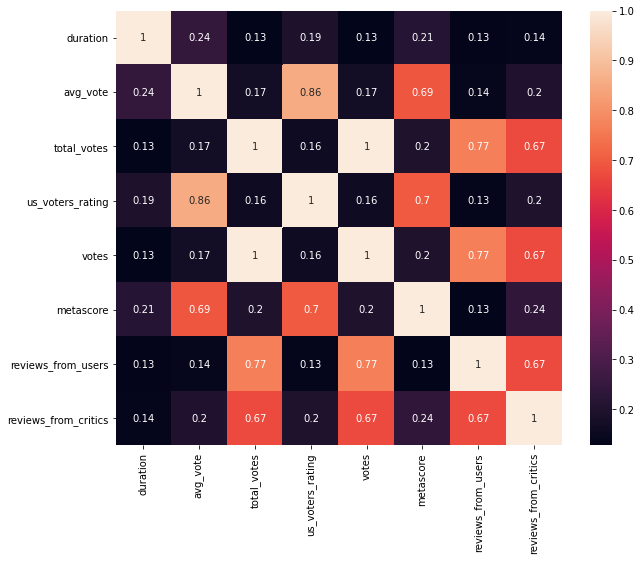

In [ ]:
#looking at the correlations between some of the numerical variables

plt.figure(figsize = (10,8))

sns.heatmap(IMDB[['duration', 'avg_vote', 'total_votes', 'us_voters_rating',
         'votes','metascore','reviews_from_users','reviews_from_critics']].corr(), annot=True)
plt.show()

In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')


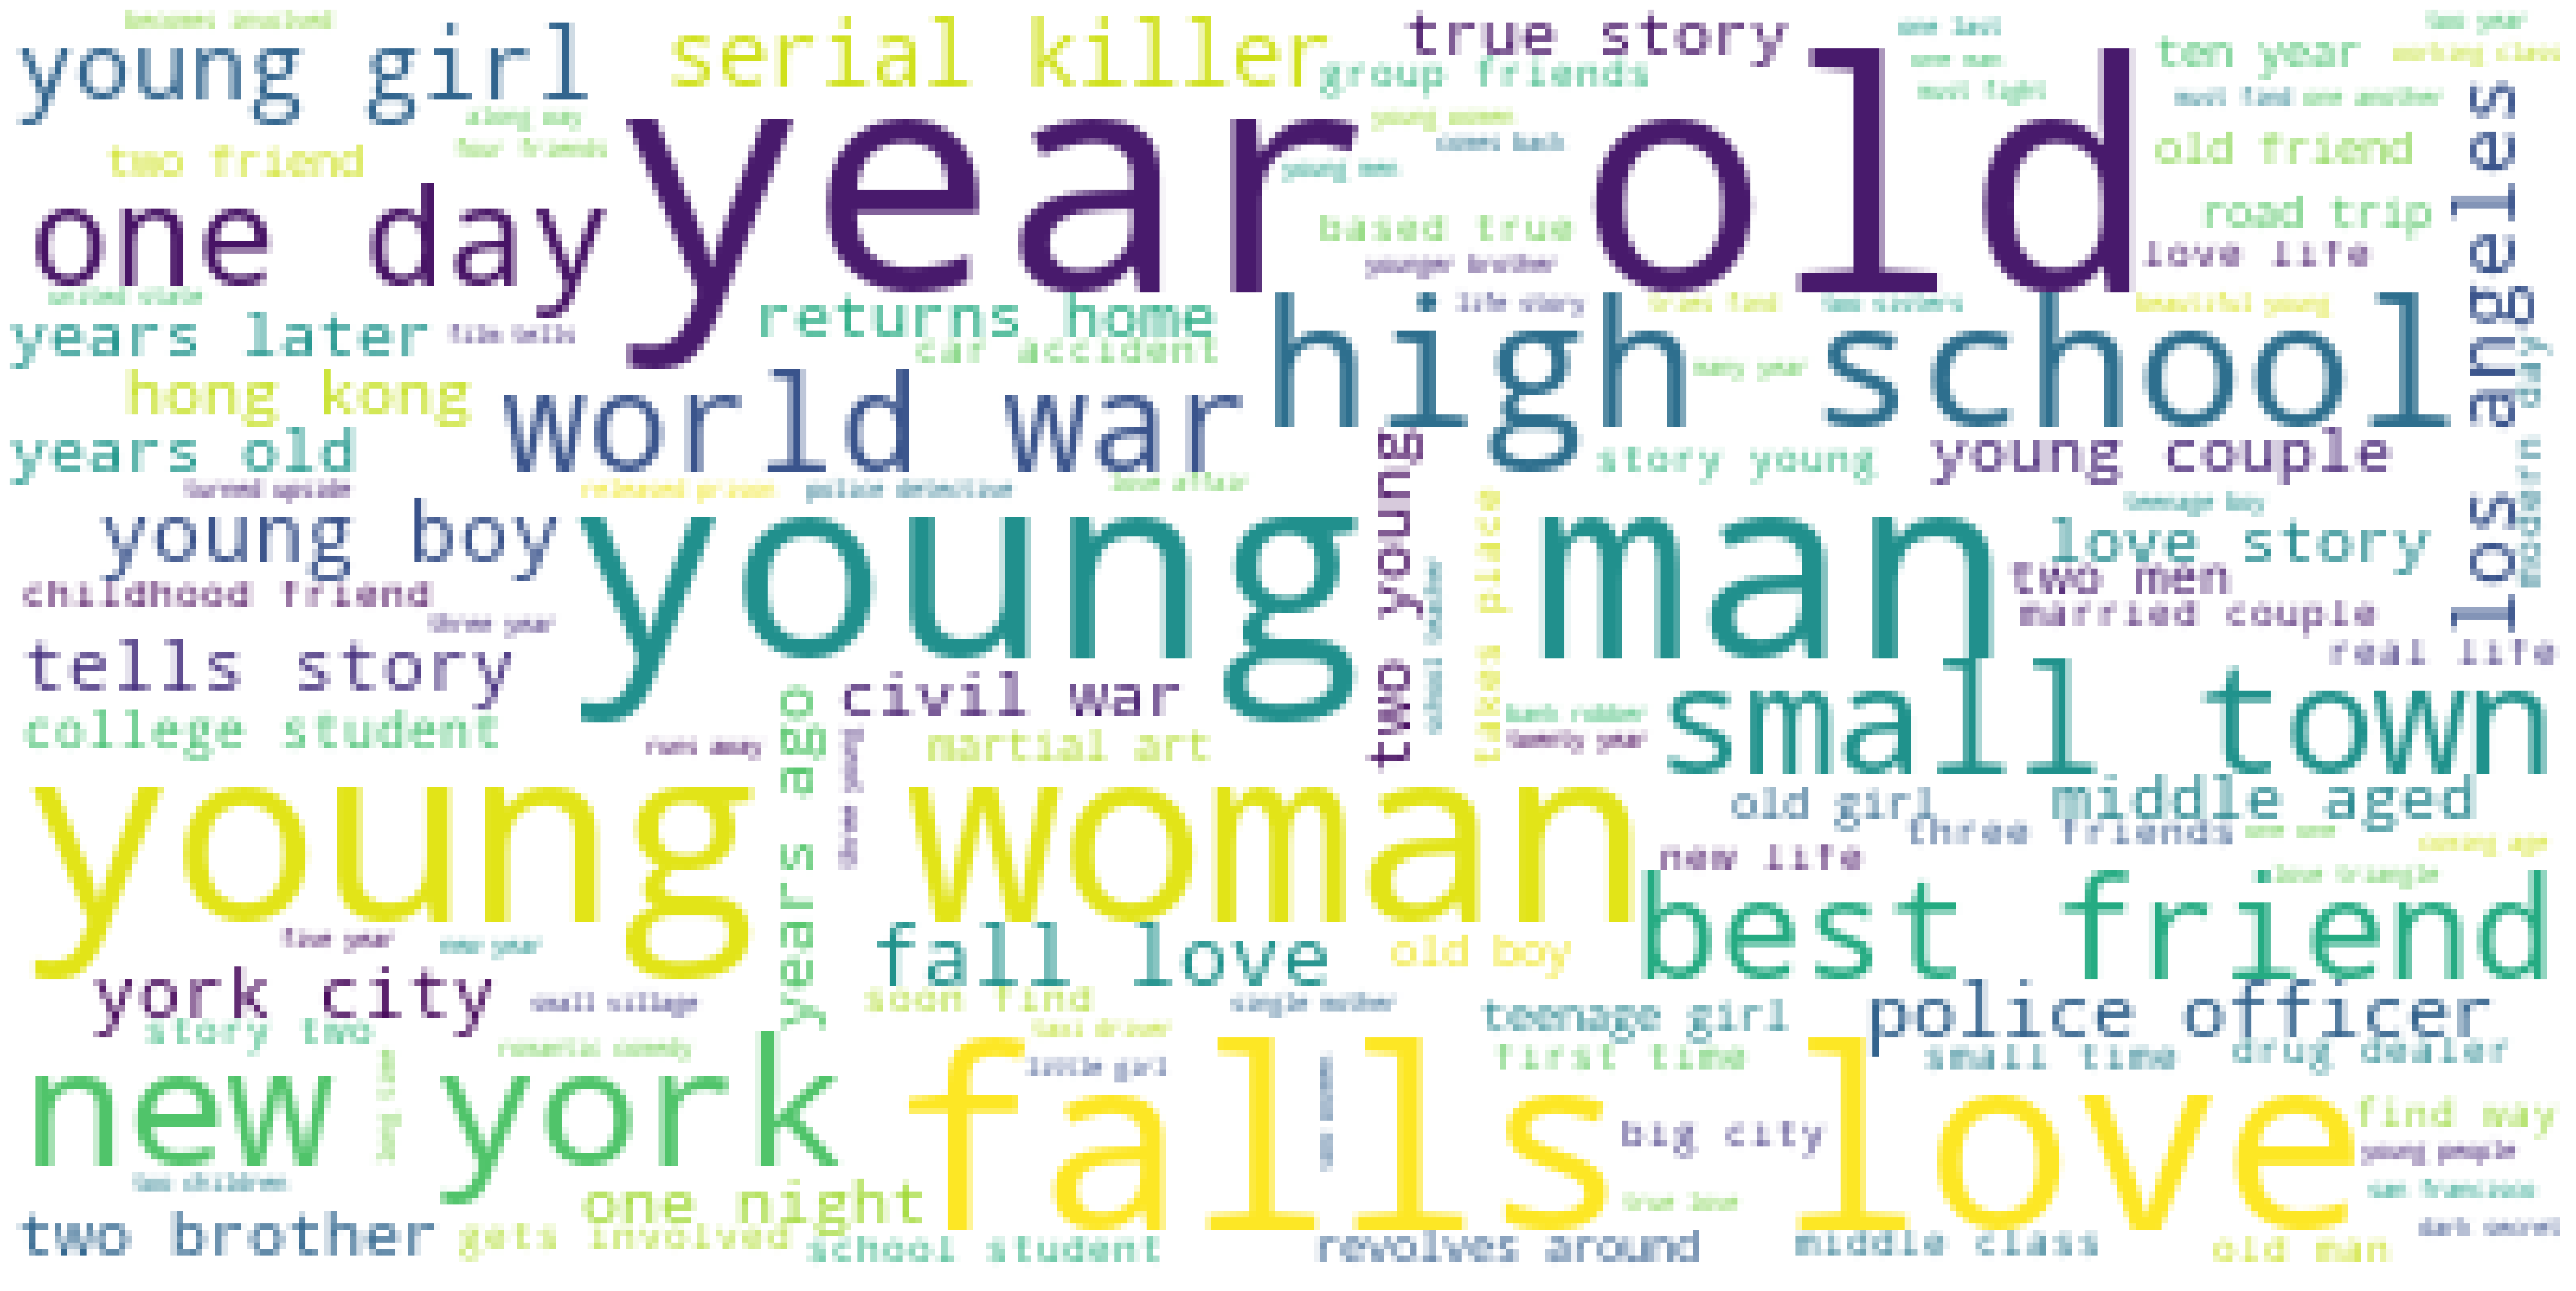

In [ ]:
wc(cleaned_description,'white','Common Words' )

# Trying Out Some Clustering

In [ ]:
x = IMDB.iloc[:, [4, 12, 13, 20, 22, 23]].values

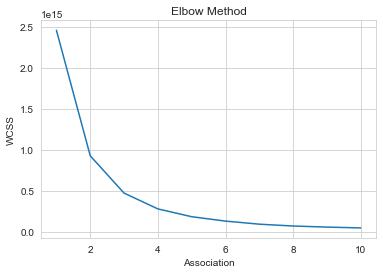

In [ ]:
#Let's select the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

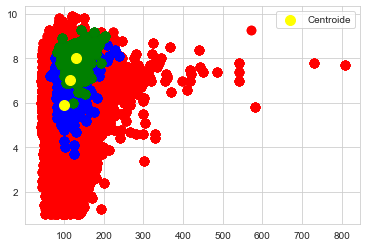

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, 
            c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, 
            c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, 
            c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')

plt.legend()

This really didn't tell me anything, I just wanted to try something out.

# IMDB Sentiment Analysis

In [ ]:
df = pd.read_csv('IMDB_sentiment.csv')
df.head()

,Unnamed: 0,text,sentiment
0,0.0,One of the other reviewers has mentioned that ...,positive
1,1.0,A wonderful little production. <br /><br />The...,positive
2,2.0,I thought this was a wonderful way to spend ti...,positive
3,3.0,Basically there's a family where a little boy ...,negative
4,4.0,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dfsentchart = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
dfsentchart.style.background_gradient(cmap='Reds')

,sentiment,text
2,positive,26801
0,negative,22741
1,neutral,454


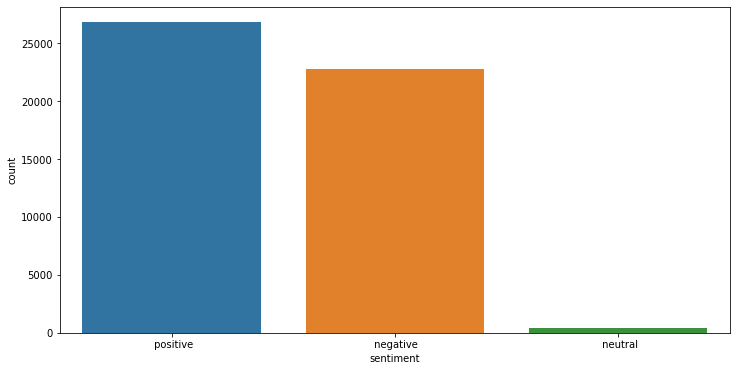

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =dfsentchart.sentiment,
    values = dfsentchart.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"},
     marker = {"colors": ["red", "grey", "black"]}
    ))
fig.show()

In [ ]:
df['wordList'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['wordList'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,568735
1,a,306960
2,and,301919
3,of,283625
4,to,261850
5,is,203056
6,in,169981
7,I,132498
8,that,126818
9,this,113726


In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
df['wordList'] = df['wordList'].apply(lambda x:remove_stopword(x))

In [ ]:
top = Counter([item for sublist in df['wordList'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,/><br,100974
2,The,67317
3,movie,60762
4,film,54277
5,one,41334
6,like,36028
7,This,24329
8,would,23578
9,good,22582
10,It,21475


In [ ]:
#top = Counter([item for sublist in df['wordList'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')
temp = temp[temp.Common_words != '/>']


In [ ]:
temp = temp[temp.Common_words != '-']
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
2,The,67317
3,movie,60762
4,film,54277
5,one,41334
6,like,36028
7,This,24329
8,would,23578
9,good,22582
10,It,21475
11,really,21322


In [ ]:
temp = temp[temp.Common_words != 'this']
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
3,movie,60762
4,film,54277
5,one,41334
6,like,36028
7,This,24329
8,would,23578
9,good,22582
10,It,21475
11,really,21322
12,even,20979


In [ ]:
temp = temp[temp.Common_words != 'it']
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
4,film,54277
5,one,41334
6,like,36028
7,This,24329
8,would,23578
9,good,22582
10,It,21475
11,really,21322
12,even,20979
13,see,20364


In [ ]:
temp = temp[temp.Common_words != 'This']
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
5,one,41334
6,like,36028
8,would,23578
9,good,22582
10,It,21475
11,really,21322
12,even,20979
13,see,20364
15,get,17333
16,much,16827


In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [ ]:
Pos = df[df['sentiment']==' positive']
Neg = df[df['sentiment']==' negative']
Neu = df[df['sentiment']==' neutral']

In [ ]:
top = Counter([item for sublist in Pos['wordList'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Blues')

,Common_words,count
0,I,66336
1,/><br,54047
2,The,35756
3,film,31788
4,movie,27919
5,one,23020
6,like,16652
7,This,13018
8,good,12411
9,It,12136


In [ ]:
temp_positive = temp_positive[temp_positive.Common_words != '/>']
temp_positive = temp_positive[temp_positive.Common_words != '/><br']
temp_positive = temp_positive[temp_positive.Common_words != '-']
temp_positive = temp_positive[temp_positive.Common_words != 'The']
temp_positive = temp_positive[temp_positive.Common_words != 'It']
temp_positive = temp_positive[temp_positive.Common_words != 'This']
temp_positive = temp_positive[temp_positive.Common_words != 'I']


In [ ]:
temp_positive

,Common_words,count
3,film,31788
4,movie,27919
5,one,23020
6,like,16652
8,good,12411
10,see,11362
11,would,11101
12,really,11041
13,great,10849
14,story,10226


In [ ]:
top = Counter([item for sublist in Neg['wordList'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Blues')

,Common_words,count
0,I,64935
1,/><br,45786
2,movie,32211
3,The,30903
4,film,21954
5,like,19004
6,one,17930
7,would,12255
8,even,12051
9,This,11096


In [ ]:
temp_negative = temp_negative[temp_negative.Common_words != '/>']
temp_negative = temp_negative[temp_negative.Common_words != '/><br']
temp_negative = temp_negative[temp_negative.Common_words != '-']
temp_negative = temp_negative[temp_negative.Common_words != 'The']
temp_negative = temp_negative[temp_negative.Common_words != 'It']
temp_negative = temp_negative[temp_negative.Common_words != 'This']
temp_negative = temp_negative[temp_negative.Common_words != 'I']


In [ ]:
temp_negative

,Common_words,count
2,movie,32211
4,film,21954
5,like,19004
6,one,17930
7,would,12255
8,even,12051
10,really,10073
11,good,9904
12,bad,9652
14,get,8884


In [ ]:
top = Counter([item for sublist in Neu['wordList'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
0,I,1207
1,/><br,1054
2,movie,616
3,The,612
4,film,532
5,one,360
6,like,347
7,good,260
8,would,211
9,This,206


In [ ]:
posWords = temp_positive.loc[:,'Common_words']

In [ ]:
negWords = temp_negative.loc[:,'Common_words']

In [ ]:
positive_fd = nltk.FreqDist(posWords)
negative_fd = nltk.FreqDist(negWords)

In [ ]:
common_set = set(positive_fd).intersection(negative_fd)

In [ ]:
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

In [ ]:
top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}

In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

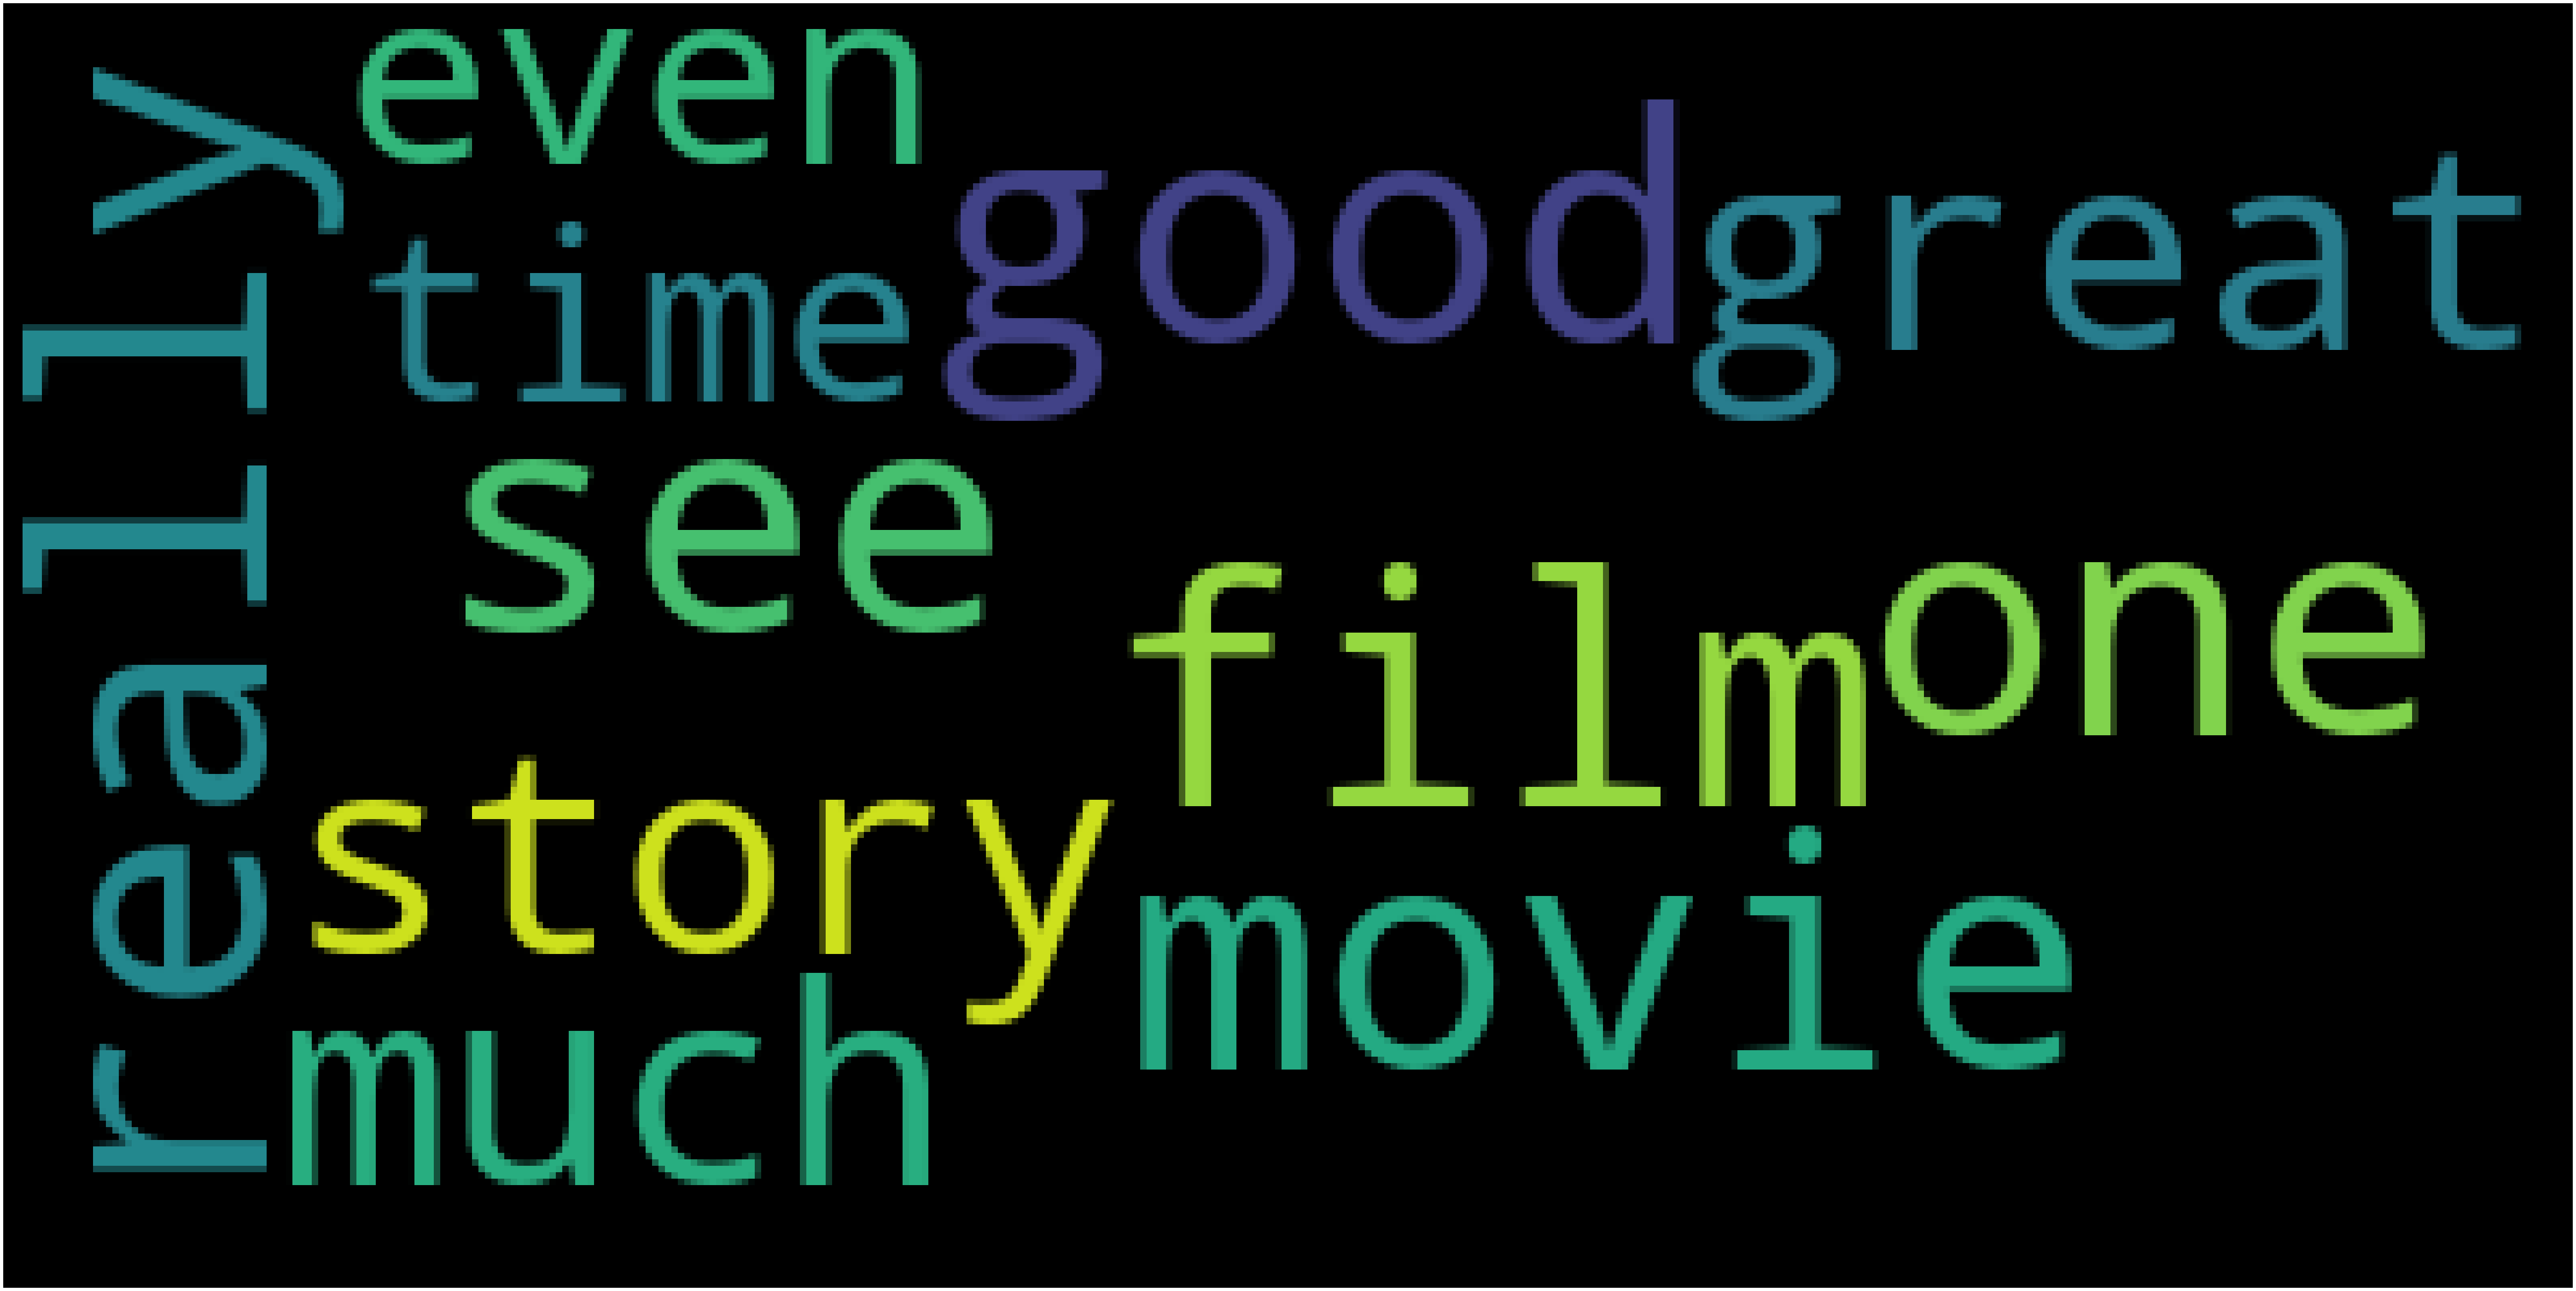

In [ ]:
wc(posWords,'black','Common Words' )

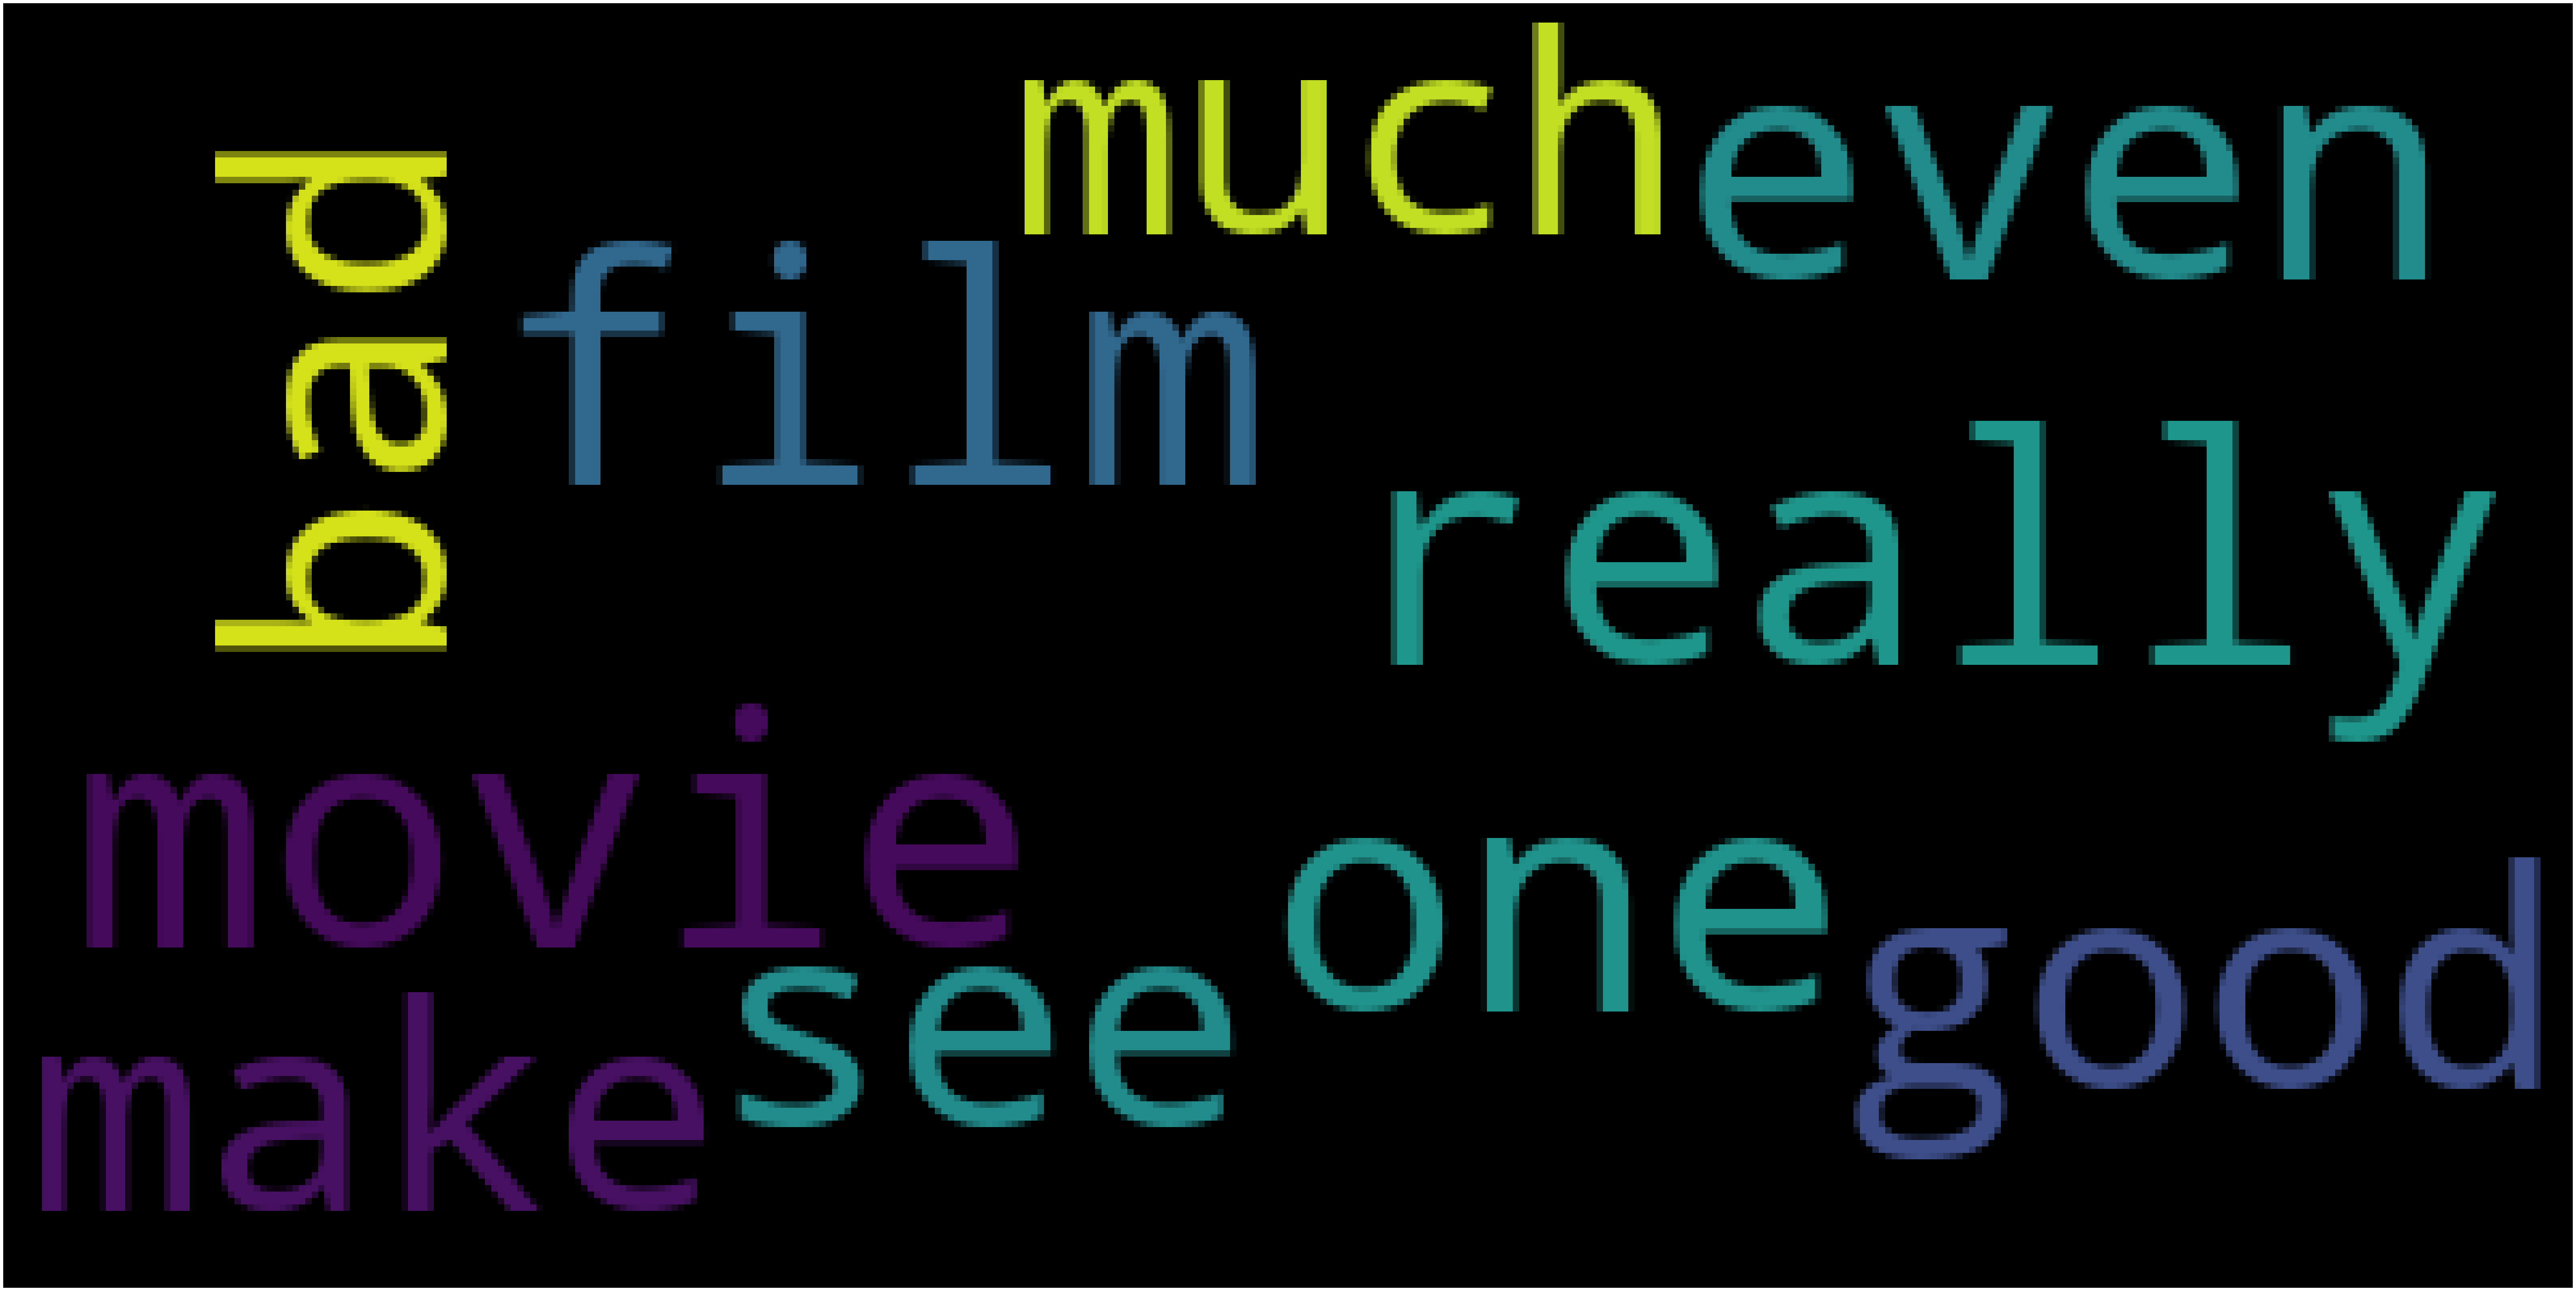

In [ ]:
wc(negWords,'black','Common Words' )

# Netflix Prize Data EDA

In [ ]:
df = pd.read_csv('/users/meghanrokas/Downloads/data.csv')
df.head()

,Unnamed: 0,movie_id,user_id,rating,date
0,0,1,1488844,3,2005-09-06
1,1,1,822109,5,2005-05-13
2,2,1,885013,4,2005-10-19
3,3,1,30878,4,2005-12-26
4,4,1,823519,3,2004-05-03


In [ ]:
df.shape

(100480507, 5)

In [ ]:
df.columns

Index(['Unnamed: 0', 'movie_id', 'user_id', 'rating', 'date'], dtype='object')

In [ ]:
df.dtypes

Unnamed: 0     int64
movie_id       int64
user_id        int64
rating         int64
date          object
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0    0
movie_id      0
user_id       0
rating        0
date          0
dtype: int64

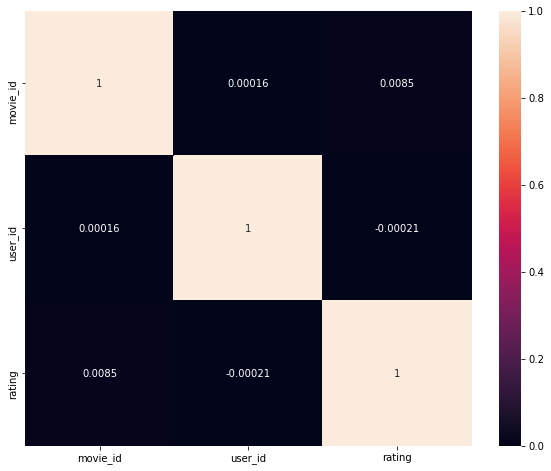

In [ ]:
#looking at the correlations between some of the numerical variables

plt.figure(figsize = (10,8))

sns.heatmap(df[['movie_id', 'user_id', 'rating']].corr(), annot=True)
plt.show()

In [ ]:
df.rating.describe()

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [ ]:
sns.catplot(x="verified", y="followers", hue="sentiment", kind="swarm", data=df2)